<a href="https://colab.research.google.com/github/Gowrish21S/DL_assignment/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3941467833.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/international-airline-passengers.csv',skipfooter=5)


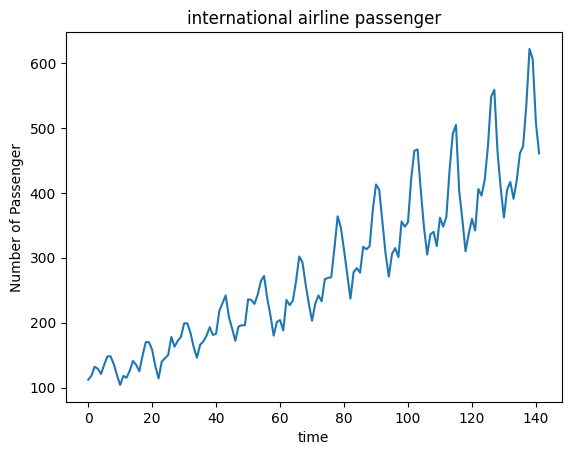

train size: 106, test size: 36 
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 - 3s - 32ms/step - loss: 0.0253
Epoch 2/100
95/95 - 0s - 4ms/step - loss: 0.0077
Epoch 3/100
95/95 - 0s - 3ms/step - loss: 0.0069
Epoch 4/100
95/95 - 0s - 3ms/step - loss: 0.0058
Epoch 5/100
95/95 - 0s - 3ms/step - loss: 0.0048
Epoch 6/100
95/95 - 0s - 4ms/step - loss: 0.0061
Epoch 7/100
95/95 - 0s - 4ms/step - loss: 0.0038
Epoch 8/100
95/95 - 0s - 3ms/step - loss: 0.0051
Epoch 9/100
95/95 - 0s - 4ms/step - loss: 0.0042
Epoch 10/100
95/95 - 0s - 3ms/step - loss: 0.0043
Epoch 11/100
95/95 - 0s - 3ms/step - loss: 0.0030
Epoch 12/100
95/95 - 0s - 3ms/step - loss: 0.0034
Epoch 13/100
95/95 - 0s - 3ms/step - loss: 0.0034
Epoch 14/100
95/95 - 0s - 3ms/step - loss: 0.0039
Epoch 15/100
95/95 - 0s - 4ms/step - loss: 0.0029
Epoch 16/100
95/95 - 0s - 5ms/step - loss: 0.0030
Epoch 17/100
95/95 - 0s - 5ms/step - loss: 0.0031
Epoch 18/100
95/95 - 0s - 5ms/step - loss: 0.0025
Epoch 19/100
95/95 - 0s - 5ms/step - loss: 0.0034
Epoch 20/100
95/95 - 1s - 6ms/step - loss: 0.0033
Epoch 21/100
95/95 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,355 (380.30 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,904 (253.54 KB)

{'name': 'lstm', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': 

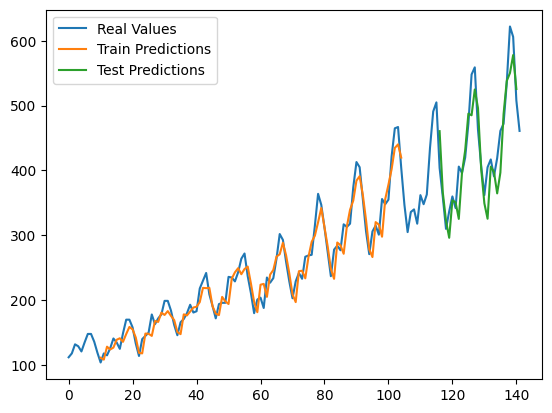

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout # Import Dropout layer
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load and preprocess data (unchanged)
data = pd.read_csv('/content/international-airline-passengers.csv',skipfooter=5)
dataset = data.iloc[:,1].values

# Plot original data (unchanged)
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")

# Scaling (unchanged)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split data (unchanged)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

# time_stamp (Lookback window) (unchanged)
time_stamp = 10

# Create X and Y datasets (unchanged)
def create_dataset(data, time_stamp):
    dataX, dataY = [], []
    for i in range(len(data) - time_stamp - 1):
        a = data[i:(i + time_stamp), 0]
        dataX.append(a)
        dataY.append(data[i + time_stamp, 0])
    return numpy.array(dataX), numpy.array(dataY)

trainX, trainY = create_dataset(train, time_stamp)
testX, testY = create_dataset(test, time_stamp)

# Reshape input to be [samples, time steps, features] (unchanged)
# For a single feature time series: [samples, 1, time_stamp]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# ------------------------------------------------------------------
# --- MODIFIED MODEL ARCHITECTURE ---
# ------------------------------------------------------------------
#
model = Sequential()
# 1. First LSTM Layer (Increased units, must return sequences)
# Return sequences must be True to stack another LSTM layer on top.
model.add(LSTM(
    units=50,                           # Increased units from 10 to 50
    return_sequences=True,              # Required for stacking LSTMs
    input_shape=(1, time_stamp)
))

# 2. Dropout Layer (Regularization)
model.add(Dropout(0.2)) # Dropout of 20% to fight overfitting

# 3. Second LSTM Layer (Increased units)
# The final LSTM layer should have return_sequences=False (default) or omit it,
# as the output goes directly to the Dense layer.
model.add(LSTM(units=50)) # Increased units from 10 to 50

# 4. Dense Output Layer (unchanged)
model.add(Dense(1))

# Compile and Fit (increased epochs, kept batch_size=1)
model.compile(loss='mean_squared_error', optimizer='adam')
# Increased epochs from 50 to 100 for better convergence with a deeper model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# ------------------------------------------------------------------


model.summary()
layer_config = model.layers[0].get_config()
print(layer_config)
plot_model(model, to_file='model_plot_stacked.png', show_shapes=True, show_layer_names=True)


# Prediction and Evaluation (unchanged)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stamp:len(trainPredict)+time_stamp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stamp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label = "Real Values")
plt.plot(trainPredictPlot, label = "Train Predictions")
plt.plot(testPredictPlot, label = "Test Predictions")
plt.legend()
plt.show()